# **Modelos Regresión Logística** 

**Cargando  el Dataset** 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
df_train = pd.DataFrame(train)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
nan_rows = df_train[df_train.isnull().any(1)]
nan_rows

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [4]:
df_train = df_train.fillna(df_train.mean())

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [5]:
procedencia = pd.get_dummies(df_train['HomePlanet'])


In [6]:
df_train[['Earth', 'Europa', 'Mars']] = procedencia[['Earth', 'Europa', 'Mars']]
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0


In [7]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Earth             0
Europa            0
Mars              0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Earth         8693 non-null   uint8  
 15  Europa        8693 non-null   uint8  
 16  Mars          8693 non-null   uint8  
dtypes: bool(1), float64(6), object(7), uint8(3)
memory usage: 917.0+ KB


In [9]:
df_train1412 = df_train.copy()
df_train1412['Cabin_Side'] = df_train1412['Cabin'].str.split("/").str[2]
df_train1412['Cabin_num'] = df_train1412['Cabin'].str.split("/").str[1]
df_train1412['Cabin_Deck'] = df_train1412['Cabin'].str.split("/").str[0]
df_train1412 = df_train1412.drop('Cabin',axis=1)
df_train1412

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_Side,Cabin_num,Cabin_Deck
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,P,0,B
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,S,0,F
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,S,0,A
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,S,0,A
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,S,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0,P,98,A
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0,S,1499,G
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0,S,1500,G
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0,S,608,E


**Sacando graficas y viendo los datos**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


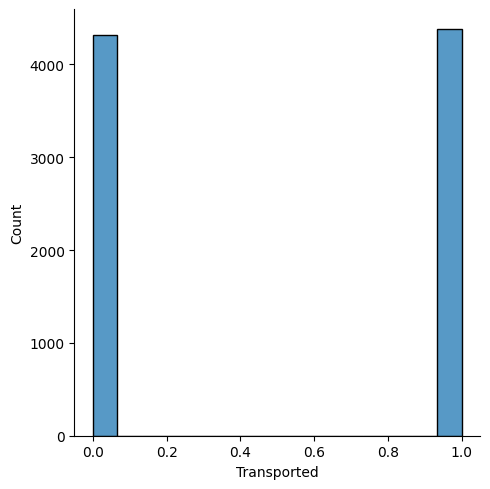

In [10]:
sns.displot(df_train['Transported'])


**Cargando el test**

In [23]:
test = pd.read_csv('test.csv')
df_test = pd.DataFrame(test)
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [25]:
df_test = df_test.fillna(df_test.mean())

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [26]:
procedenciat = pd.get_dummies(df_train['HomePlanet'])

In [27]:
df_test[['Earth', 'Europa', 'Mars']] = procedenciat[['Earth', 'Europa', 'Mars']]
newtest= df_test.drop(['HomePlanet', 'Destination','Cabin', 'Name'], axis=1)

In [28]:
df_test2 = newtest[train_c]
df_test2

,PassengerId,Earth,Mars,Europa,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,1,True,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,0,1,True,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,1,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,False,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,0,True,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,False,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,0,1,0,True,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,1,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [29]:
df_test2.isnull().sum()

PassengerId     0
Earth           0
Mars            0
Europa          0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [30]:
prediccion = pd.DataFrame(tree.predict(df_test2))
prediccion['PassengerId'] =df_test2['PassengerId']
prediccion = prediccion.rename(columns = {0:'Transported'})


prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('Submision.csv', index=False)
prediccion



,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [31]:
df_test2

,PassengerId,Earth,Mars,Europa,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,1,True,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,0,1,True,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,1,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,False,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,0,True,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,False,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,0,1,0,True,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,1,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0


# **Segundo modelo Regresión logística**

In [32]:
from sklearn.linear_model import LogisticRegression

**Entrenando el modelo**

In [33]:
X = df_train[['PassengerId', 'Earth', 'Mars', 'Europa', 'CryoSleep',  'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       ]]
y = df_train['Transported']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.75,
                                                    random_state=0)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6519, 12)	y_train: (6519,)
X_test: (2174, 12)	y_test: (2174,)


In [35]:
lgr = LogisticRegression()

lgr.fit(X_train, y_train)

c:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [36]:
lgr.predict(X_test)

array([ True,  True, False, ...,  True,  True,  True])

In [37]:
score = lgr.score(X_test, y_test)
print(score * 100, "%")

77.82888684452622 %


In [38]:
import sklearn.metrics as metrics
predictions = lgr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[720 357]
 [125 972]]


In [39]:
df_test2 = newtest[train_c]
df_test2

,PassengerId,Earth,Mars,Europa,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,0,1,True,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,0,1,True,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,1,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,False,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,0,True,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,False,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,0,1,0,True,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,1,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [40]:
df_test2.isnull().sum()

PassengerId     0
Earth           0
Mars            0
Europa          0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [41]:
prediccion = pd.DataFrame(lgr.predict(df_test2))
prediccion['PassengerId'] =df_test2['PassengerId']
prediccion = prediccion.rename(columns = {0:'Transported'})


prediccion = prediccion[['PassengerId','Transported']]
prediccion.to_csv('Submision2.csv', index=False)
prediccion



,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [42]:
prediccion.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

# **Segundo Modelo con más filas y más datos introduciendo la cabina**

In [135]:
df_train14 = pd.DataFrame(df_train.copy())
df_train14['Cabin_Side'] = df_train14['Cabin'].str.split("/").str[2]
df_train14['Cabin_num'] = df_train14['Cabin'].str.split("/").str[1]
df_train14['Cabin_Deck'] = df_train14['Cabin'].str.split("/").str[0]
df_train14 = df_train14.drop('Cabin',axis=1)


In [136]:
cabinas4 = pd.get_dummies(df_train14['Cabin_Side'])
df_train14[['Cabin_P', 'Cabin_S']] = cabinas4[['P', 'S']]
df_train14.drop('Cabin_Side', axis=1)



,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,B,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,F,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,A,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,A,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0,98,A,1,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0,1499,G,0,1
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0,1500,G,0,1
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0,608,E,0,1


In [138]:
df_train14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Earth         8693 non-null   uint8  
 14  Europa        8693 non-null   uint8  
 15  Mars          8693 non-null   uint8  
 16  Cabin_Side    8494 non-null   object 
 17  Cabin_num     8494 non-null   object 
 18  Cabin_Deck    8494 non-null 

In [121]:
df_train1412['Cabin_num'] = df_train1412['Cabin_num'].astype('float64')

In [139]:
procedencia14 = pd.get_dummies(df_train14['HomePlanet'])
df_train14[['Earth', 'Europa', 'Mars']] = procedencia14[['Earth', 'Europa', 'Mars']]
df_train14 = df_train14.drop(['HomePlanet', 'Destination', 'Name'], axis=1)


In [141]:
df_train14.isnull().sum()


PassengerId       0
CryoSleep         0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Earth             0
Europa            0
Mars              0
Cabin_Side      199
Cabin_num       199
Cabin_Deck      199
Cabin_P           0
Cabin_S           0
dtype: int64

In [142]:
df_train14['Cabin_num'].fillna(df_train14['Cabin_num'].mode()[0], inplace=True)
df_train14['Cabin_Side'].fillna(df_train14['Cabin_Side'].mode()[0], inplace=True)
df_train14['Cabin_Deck'].fillna(df_train14['Cabin_Deck'].mode()[0], inplace=True)

In [143]:
df_train14.isnull().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Earth           0
Europa          0
Mars            0
Cabin_Side      0
Cabin_num       0
Cabin_Deck      0
Cabin_P         0
Cabin_S         0
dtype: int64

In [144]:
letras16 = pd.get_dummies(df_train14['Cabin_Deck'])
df_train14[['B','F','A','G','E','D','C','T']] = letras16[['B','F','A','G','E','D','C','T']]
df_train14


,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,1,0,1,0,0,0,0,0,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,1,0,0,0,0,0,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,0,0,1,0,0,0,0,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,0,0,1,0,0,0,0,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,0,0,1,0,0,0,0,0
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,1,0,0,0,0
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,1,0,0,0,0
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [145]:
X = df_train1412[['PassengerId',  'CryoSleep', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
        'Earth', 'Europa', 'Mars',  'Cabin_num', 
         'Cabin_P', 'Cabin_S', 'B', 'F', 'A', 'G', 'E', 'D', 'C', 'T']]

y = df_train1412['Transported']

In [132]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

print(f"X_train: {X_train1.shape}\ty_train: {y_train1.shape}")
print(f"X_test: {X_test1.shape}\ty_test: {y_test1.shape}")

X_train: (6954, 23)	y_train: (6954,)
X_test: (1739, 23)	y_test: (1739,)


In [146]:
lgr2 = LogisticRegression()

lgr2.fit(X_train1, y_train1)

LogisticRegression()

In [147]:
lgr2.predict(X_test1)
score2 = lgr2.score(X_test1, y_test1)
print(score2 * 100, "%")

77.40080506037953 %


**Predicciones del modelo para hacer la submission**

In [148]:
df_test16 = df_test

In [149]:
df_test16['Cabin_Side'] = df_test16['Cabin'].str.split("/").str[2]
df_test16['Cabin_num'] = df_test16['Cabin'].str.split("/").str[1]
df_test16['Cabin_Deck'] = df_test16['Cabin'].str.split("/").str[0]
df_test16 = df_test16.drop('Cabin',axis=1)

In [150]:
cabinas2 = pd.get_dummies(df_test16['Cabin_Side'])
df_test16[['Cabin_P', 'Cabin_S']] = cabinas2[['P', 'S']]
df_test16.drop('Cabin_Side', axis=1)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars,Cabin_num,Cabin_Deck,Cabin_P,Cabin_S
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,3,G,0,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0,4,F,0,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0,0,C,0,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0,1,C,0,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0,5,F,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0,1496,G,0,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0,NaN,NaN,0,0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1,296,D,1,0
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0,297,D,1,0


In [151]:
df_test16['Cabin_num'] = df_test16['Cabin_num'].astype('float64')

In [152]:
procedencia16 = pd.get_dummies(df_test16['HomePlanet'])
df_test16[['Earth', 'Europa', 'Mars']] = procedencia16[['Earth', 'Europa', 'Mars']]
df_test16 = df_test16.drop(['HomePlanet', 'Destination', 'Name'], axis=1)


In [153]:
df_test16['Cabin_num'].fillna(df_test16['Cabin_num'].mode()[0], inplace=True)
df_test16['Cabin_Side'].fillna(df_test16['Cabin_Side'].mode()[0], inplace=True)
df_test16['Cabin_Deck'].fillna(df_test16['Cabin_Deck'].mode()[0], inplace=True)

In [154]:
letras16 = pd.get_dummies(df_test16['Cabin_Deck'])
df_test16[['B','F','A','G','E','D','C','T']] = letras16[['B','F','A','G','E','D','C','T']]


In [155]:
df_test16 = df_test16.drop(['Cabin_Side', 'Cabin_Deck'], axis=1)
df_test16

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_P,Cabin_S,B,F,A,G,E,D,C,T
0,0013_01,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
1,0018_01,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
2,0019_01,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0021_01,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,0,0,0,0,1,0
4,0023_01,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
4273,9269_01,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,1,0,0,0,0,0,0
4274,9271_01,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
4275,9273_01,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,0,0,1,0,0


In [156]:
prediccion16 = pd.DataFrame(lgr2.predict(df_test16))
prediccion16['PassengerId'] =df_test16['PassengerId']
prediccion16 = prediccion16.rename(columns = {0:'Transported'})


prediccion16 = prediccion16[['PassengerId','Transported']]
prediccion16.to_csv('Submision16.csv', index=False)
prediccion16


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
